<a href="https://colab.research.google.com/github/Spandana2704/ML/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [2]:
df=pd.read_csv("/content/Indian_Kids_Screen_Time.csv") #loading the dataset
df.shape

(9712, 8)

In [12]:
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban
...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban


In [18]:
df['Health_Impacts'].value_counts()

,count
Health_Impacts,
Poor Sleep,2268
"Poor Sleep, Eye Strain",979
Eye Strain,644
"Poor Sleep, Anxiety",608
"Poor Sleep, Obesity Risk",452
Anxiety,385
"Poor Sleep, Eye Strain, Anxiety",258
Obesity Risk,252
"Poor Sleep, Eye Strain, Obesity Risk",188


In [13]:
[col for col in df.columns if df[col].isnull().sum()>0] #check if there is null data

[]

In [14]:
df[df['Health_Impacts'].isnull()] #displaying the samples with null values

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural


In [6]:
df.columns

Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')

In [7]:
df = df.dropna(subset=['Health_Impacts'])

In [8]:
[col for col in df.columns if df[col].isnull().sum()>0] #checking for null values

[]

In [9]:
X= df.drop(labels=['Health_Impacts'],axis=1) #input variables
y=df['Health_Impacts'] #output variable

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

**CONSTANT FEATURES:**

In this method we remove all the columns with same value in all the data (variance=std=0)

In [11]:
constant_features=[features for features in x_train.columns if x_train[features].std()==0]
print(constant_features)

TypeError: could not convert string to float: 'Male'

**get_dummies:**
converting categorical data into numerical form - one hot encoding.

drop_first=True avoids duplicate information

In [15]:
X=pd.get_dummies(X,drop_first=True) #encoding the output varaibles to avoid the above error

In [16]:
X.shape

(6494, 9)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
constant_features=[features for features in x_train.columns if x_train[features].std()==0]
len(constant_features)

1

In [ ]:
x_train.drop(labels=constant_features,axis=1,inplace=True) #deleting constant features
x_test.drop(labels=constant_features,axis=1,inplace=True)

**QUASI-CONSTANT FEATURES:**

Removing the columns where 99.9% values are same




In [ ]:
quasi_constant_feat=[] #to store the names of features that are quasi-constant

for feature in x_train.columns:

  #for every column in x_train it counts how many times a value is repeated and divides it with length of x_train to get a proportion of each value.Next sorting them in descending order and taking the most fequent proportion value as predominant value.
  predominant=(x_train[feature].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]

  #checking if predominant value is >0.999 or not. if yes then appending the feature to quasi_constant_feat list
  if predominant>0.999:
    quasi_constant_feat.append(feature)

len(quasi_constant_feat)

0

In this case there are no quasi-constant features but in case there are quasi constant features, we have to delete them.

x_train.drop(labels=quasi_constant_feat,axis=1,inplace=True)

x_test.drop(labels=quasi_constant_feat,axis=1,inplace=True)

**DUPLICATED FEATURES:**

When we are one-hot encoding the data there is a chance that duplicated features exist in the data.

In [ ]:
dup=[]
for i in range (0,len(x_train.columns)):
    col1=x_train.columns[i]
    for col2 in x_train.columns[i+1:]:
        if x_train[col1].equals(x_train[col2]):
            dup.append(col2)
dup_features=set(dup)          #set is used because it contains unique values
print(len(dup_features))

0


Here, there are no duplicated features, but if there are any we have to drop them.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

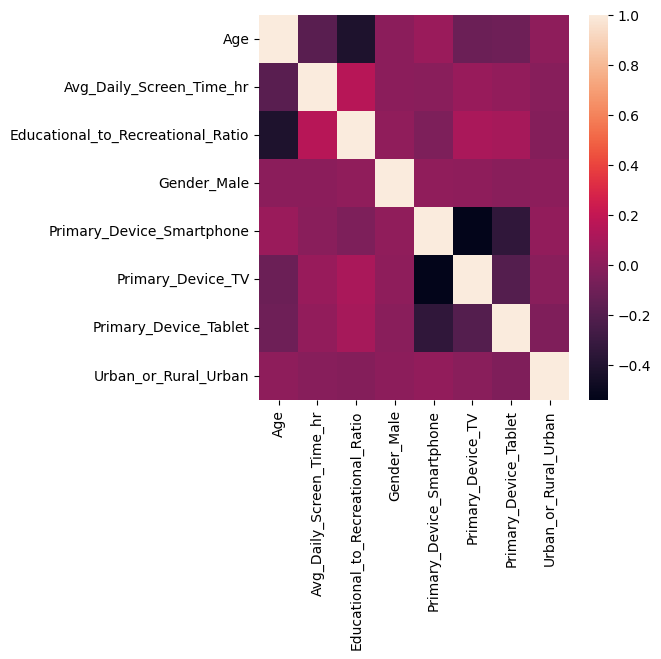

In [ ]:
corrmat=x_train.corr()
fig,ax=plt.subplots()
fig.set_size_inches(5,5)
sns.heatmap(corrmat)

In [ ]:
df2=pd.read_csv("/content/Indian_Kids_Screen_Time.csv") #loading the dataset
df2.shape

(9712, 8)

In [ ]:
[col for col in df2.columns if df2[col].isnull().sum()>0] #check if there is null data

['Health_Impacts']

In [ ]:
X2= df2.drop(labels=['Health_Impacts'],axis=1) #input variables
X2=pd.get_dummies(X2,drop_first=True) #encoding the output varaibles to avoid the above error
y2=df2['Health_Impacts'] #output variable
x_train2,x_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.3,random_state=0)

<Axes: >

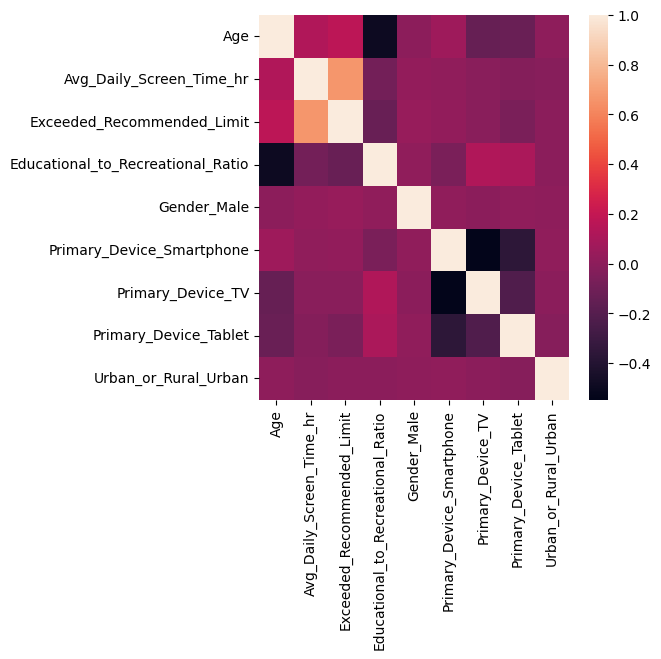

In [ ]:
corrmat=x_train2.corr()
fig,ax=plt.subplots()
fig.set_size_inches(5,5)
sns.heatmap(corrmat)

In [ ]:
grouped_feature_ls = []
correlated_groups = []
def correlation (dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname=corr_matrix.columns[i] #3 getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features=correlation (x_test, 0.9) # filter for all the features with corre lation more than 0.9
correlated_features = set(corr_features) # Set statement is used to identify the unique feature in the list
print(len(correlated_features)) # length of set of correlated features

0


In this case, there are no correlated features but if there are any we have to delete them.

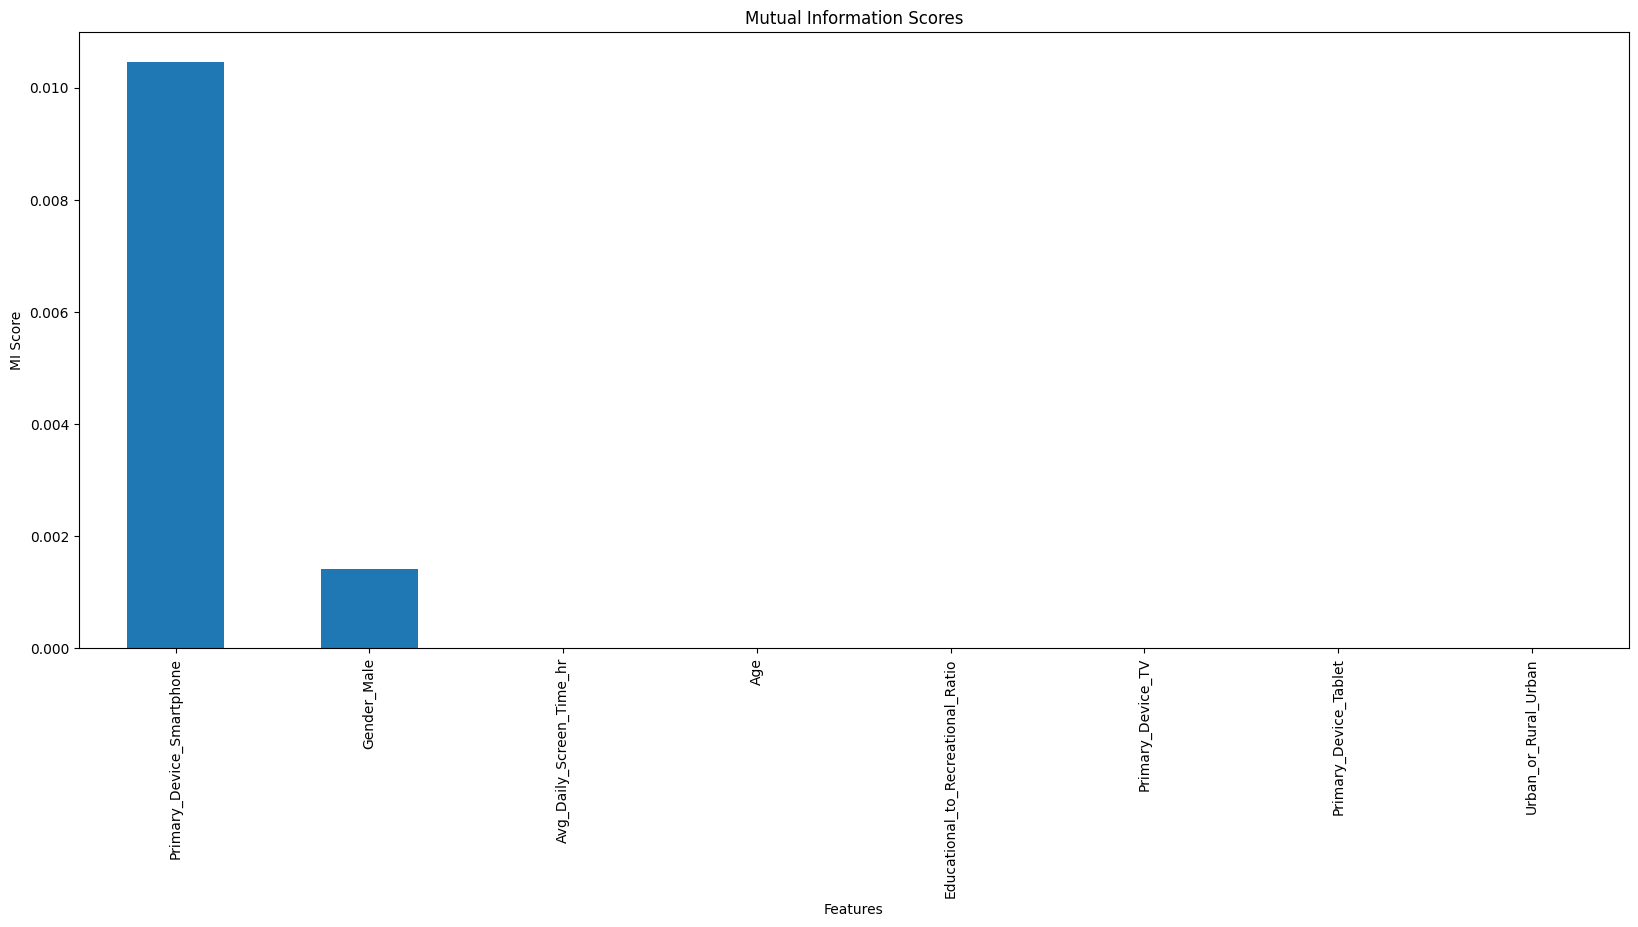

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


Top 10 Selected Features:
 ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio', 'Gender_Male', 'Primary_Device_Smartphone', 'Primary_Device_TV', 'Primary_Device_Tablet', 'Urban_or_Rural_Urban']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Step 1: Calculate Mutual Information scores
mi = mutual_info_classif(x_train.fillna(0), y_train)
mi = pd.Series(mi, index=x_train.columns)

# Step 2: Visualize MI scores
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.title("Mutual Information Scores")
plt.ylabel("MI Score")
plt.xlabel("Features")
plt.show()

# Step 3: Select top 10 features based on MI
selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(x_train.fillna(0), y_train)

# Step 4: Get selected feature names
selected_features = x_train.columns[selector.get_support()]
print("Top 10 Selected Features:\n", selected_features.tolist())